## Baseline model test
#### Trivial DNN
Followed this: https://www.tensorflow.org/tutorials/load_data/numpy
&nbsp;

and some part of this: https://www.tensorflow.org/tutorials/images/classification


In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
file = '../data/home_sale_data_320.csv'

data = pd.read_csv(file)
train_labels = data['label']
data.drop(['label'], axis=1, inplace=True)
data

,OverallQual,GrLivArea,GarageCars,Total_Bathrooms,GarageArea,YrBltAndRemod,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath,...,MSZoning_RM,HeatingQC_TA,CentralAir_N,GarageType_Detchd,MasVnrType_None,GarageFinish_Unf,BsmtQual_TA,FireplaceQu_None,KitchenQual_TA,ExterQual_TA
0,0.650999,0.569871,0.307827,1.611715,0.354247,1.094212,-0.428194,-0.778576,1.047388,0.782852,...,-0.434337,-0.644335,-0.267212,-0.603411,-1.239239,-0.854195,-0.885269,1.026105,-1.023991,-1.268236
1,-0.061429,-0.372791,0.307827,0.174120,-0.056586,-0.077091,0.521274,0.435860,0.155274,0.782852,...,-0.434337,-0.644335,-0.267212,-0.603411,0.806947,-0.854195,-0.885269,-0.974559,0.976571,0.788497
2,0.650999,0.705404,0.307827,1.611715,0.634360,1.029140,-0.275823,-0.552213,0.981305,0.782852,...,-0.434337,-0.644335,-0.267212,-0.603411,-1.239239,-0.854195,-0.885269,-0.974559,-1.023991,-1.268236
3,0.650999,0.582597,1.621732,-0.279060,0.793091,-1.530375,-0.668731,-0.415506,-1.860240,-1.027221,...,-0.434337,-0.644335,-0.267212,1.657245,0.806947,1.170693,1.129600,-0.974559,-1.023991,0.788497
4,1.363427,1.354429,1.621732,1.611715,1.698790,0.964067,0.251510,0.132455,0.948264,0.782852,...,-0.434337,-0.644335,-0.267212,-0.603411,-1.239239,-0.854195,-0.885269,-0.974559,-1.023991,-1.268236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,-1.486284,-0.819162,-2.319985,-0.844079,-2.204119,-0.337381,-1.185593,-2.198241,-0.042973,-1.027221,...,2.302361,-0.644335,-0.267212,-0.603411,0.806947,-0.854195,1.129600,1.026105,0.976571,0.788497
2907,-1.486284,-0.819162,-1.006079,-0.844079,-0.868913,-0.337381,-1.185593,-2.198241,-0.042973,-1.027221,...,2.302361,1.551987,-0.267212,-0.603411,0.806947,1.170693,1.129600,1.026105,0.976571,0.788497
2908,-0.773857,-0.467252,0.307827,-0.279060,0.484966,0.009672,0.433960,0.340588,-0.373385,-1.027221,...,-0.434337,-0.644335,-0.267212,1.657245,0.806947,1.170693,1.129600,-0.974559,0.976571,0.788497
2909,-0.773857,-1.183409,-2.319985,-1.058431,-2.204119,0.617014,-0.294807,-0.386295,0.683934,-1.027221,...,-0.434337,1.551987,-0.267212,-0.603411,0.806947,-0.854195,-0.885269,1.026105,0.976571,0.788497


In [3]:
'''test reshape'''
tmp = [[1,2,3,4], [5,6, 7,8], [9,10,11,12]]
tmp = np.array(tmp)
tmp.shape
tmp.reshape(3,2,2)


array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]]])

In [4]:
data_np = data.to_numpy()
data_np.shape
data_np = data_np.reshape(len(data), 20, 16)
data_np.shape

(2911, 20, 16)

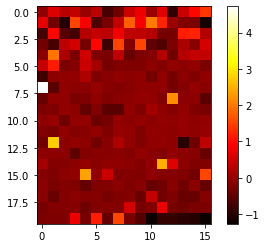

In [5]:
# data_np[0].shape

nArray = np.array(data_np[99])


a11=nArray.reshape(20,16)
plt.imshow(a11, cmap='hot')
plt.colorbar()
plt.show()

In [6]:
train_labels.shape

(2911,)

In [7]:
train_examples = data_np
train_examples.shape

(2911, 20, 16)

In [8]:
val_examples = train_examples[-291:]
train_examples = train_examples[:-291]
val_labels = train_labels[-291:]
train_labels = train_labels[:-291]

train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_examples, val_labels))
# test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-04-17 00:21:51.059237: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-17 00:21:51.059391: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(20, 16), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [10]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
BATCH_SIZE = 16
SHUFFLE_BUFFER_SIZE = 64

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
# test_dataset = test_dataset.batch(BATCH_SIZE)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(20, 16)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])




In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense (Dense)               (None, 128)               41088     
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 42,378
Trainable params: 42,378
Non-trainable params: 0
_________________________________________________________________


In [13]:
epochs = 10
history = model.fit(train_dataset, epochs=epochs, validation_data=(val_examples, val_labels))


Epoch 1/10


2022-04-17 00:21:54.617268: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-17 00:21:54.617894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


164/164 [==============================] - 2s 7ms/step - loss: 1.6470 - sparse_categorical_accuracy: 0.3214 - val_loss: 1.3888 - val_sparse_categorical_accuracy: 0.3505
Epoch 2/10
  1/164 [..............................] - ETA: 0s - loss: 0.9940 - sparse_categorical_accuracy: 0.5625

2022-04-17 00:21:55.957243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


164/164 [==============================] - 1s 5ms/step - loss: 1.2671 - sparse_categorical_accuracy: 0.4454 - val_loss: 1.4085 - val_sparse_categorical_accuracy: 0.3883
Epoch 3/10
164/164 [==============================] - 1s 5ms/step - loss: 1.1414 - sparse_categorical_accuracy: 0.5042 - val_loss: 1.4169 - val_sparse_categorical_accuracy: 0.4089
Epoch 4/10
164/164 [==============================] - 1s 7ms/step - loss: 1.0507 - sparse_categorical_accuracy: 0.5637 - val_loss: 1.4681 - val_sparse_categorical_accuracy: 0.4055
Epoch 5/10
164/164 [==============================] - 1s 6ms/step - loss: 0.9676 - sparse_categorical_accuracy: 0.6073 - val_loss: 1.5074 - val_sparse_categorical_accuracy: 0.4089
Epoch 6/10
164/164 [==============================] - 1s 5ms/step - loss: 0.8857 - sparse_categorical_accuracy: 0.6599 - val_loss: 1.5721 - val_sparse_categorical_accuracy: 0.4124
Epoch 7/10
164/164 [==============================] - 1s 5ms/step - loss: 0.8130 - sparse_categorical_accuracy:

In [14]:
# history.history

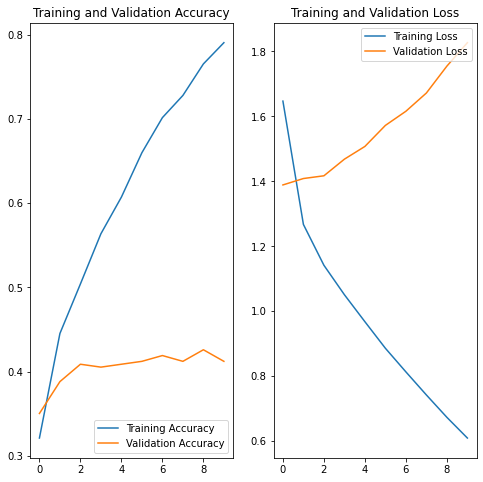

In [15]:
from matplotlib import pyplot as plt

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [72]:
model.evaluate(test_dataset)

157/157 [==============================] - 1s 4ms/step - loss: 0.6444 - sparse_categorical_accuracy: 0.9575


[0.6444269418716431, 0.9575000405311584]

In [ ]:
#  model = tf.keras.models.Sequential([
#    tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
#                   activation='relu'),
#    tf.keras.layers.Conv2D(64, kernel_size=(3, 3),
#                   activation='relu'),
#    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
#  #   tf.keras.layers.Dropout(0.25),
#    tf.keras.layers.Flatten(),
#    tf.keras.layers.Dense(128, activation='relu'),
#  #   tf.keras.layers.Dropout(0.5),
#    tf.keras.layers.Dense(10, activation='softmax')
#  ])
# model.compile(
#     loss='sparse_categorical_crossentropy',
#     optimizer=tf.keras.optimizers.Adam(0.001),
#     metrics=['accuracy'],
# )
# model.fit(
#     train_dataset,
#     epochs=12,
    
# )